In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
_xrange=[-1,+1]
_yrange=[-1,+1]
n_unlabeled=10000
unl=np.zeros([2,n_unlabeled])

In [121]:
unl[0,:]=random.rand(n_unlabeled)*(_xrange[1]-_xrange[0])+_xrange[0]
unl[1,:]=random.rand(n_unlabeled)*(_yrange[1]-_yrange[0])+_yrange[0]

In [164]:
_bias=0.8
def F(instance):
    if instance[0]>0:
        return _bias
    else:
        return 1-_bias
def y_given_x(instances):
    p=np.apply_along_axis(F,0,instances)
    y=np.random.rand(len(p))<p
    return p,y
p,y=y_given_x(unl)
print '>1/2',y[p>.5][:5]
print '<1/2',y[p<.5][:5]

>1/2 [ True  True  True  True  True]
<1/2 [False False False False False]


In [165]:
c=['b' if l else 'r' for l in y]
c[:5]

['r', 'r', 'b', 'r', 'b']

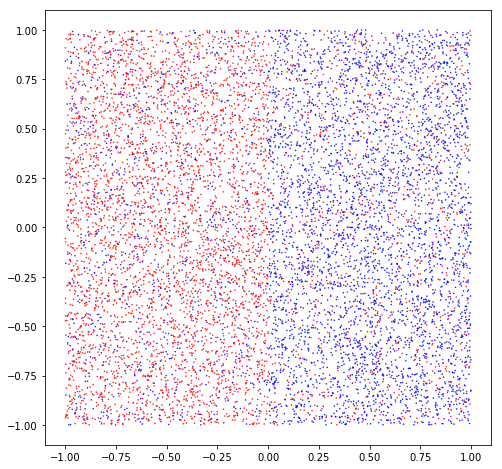

In [166]:
figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],marker='.',s=1,c=c);

In [193]:
#initialize labeled to be a 1% sample
n=unl.shape[1]
labeled=np.random.rand(n)<0.1

In [194]:
_x=0.5; _y=0.0; _r=0.5
#def conf_bar(x,y,r,unl,
def _in_ball(_x,_y,_r,unl):
    return (unl[0,:]-_x)**2+(unl[1,:]-_y)**2 < _r**2
in_ball=_in_ball(_x,_y,_r,unl)

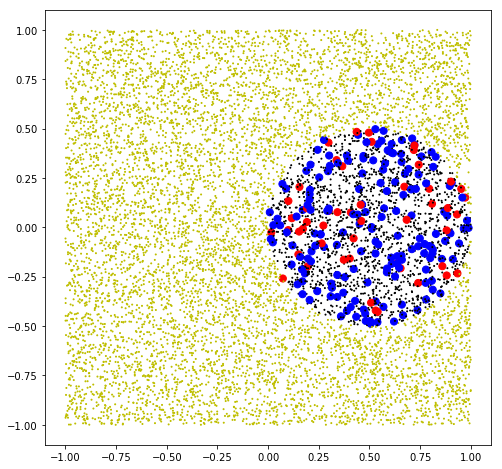

In [196]:
c=['y']*n
s=[1]*n
for i in range(n):
    if in_ball[i]:
        if  labeled[i]:
            s[i]=50
            if y[i]:
                c[i]='b'
            else:
                c[i]='r'
        else:
            c[i]='k'

figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],s=s,c=c);

In [207]:
B=[]
for i in range(1000):
    _x,=random.rand(1)*(_xrange[1]-_xrange[0])+_xrange[0]
    _y,=random.rand(1)*(_yrange[1]-_yrange[0])+_yrange[0]
    _r,=random.rand(1)/2.0
    in_ball = (unl[0,:]-_x)**2+(unl[1,:]-_y)**2 < _r**2

    k=sum(labeled*in_ball)
    pos=sum(labeled*in_ball*y)

    if k>0:
        bias=(2.*pos-k)/k 
        normal_bias = abs(bias)-4/sqrt(k+0.0)
        #print "x=%6.2f, y=%6.2f, r=%6.2f, k=%4d, bias=%6.3f, normal_bias=%5.3f"\
        #%(_x,_y,_r,k,bias,normal_bias)
        if normal_bias>0:
            B.append({'x':_x,'y':_y,'r':_r,'bias':bias,'normal_bias':normal_bias})


In [208]:
c=np.array(['y']*n)
for b in B:
    _x=b['x']
    _y=b['y']
    _r=b['r']
    pol='b' if b['bias']>0 else 'r'
    
    points=_in_ball(_x,_y,_r,unl)
    c[points]=pol

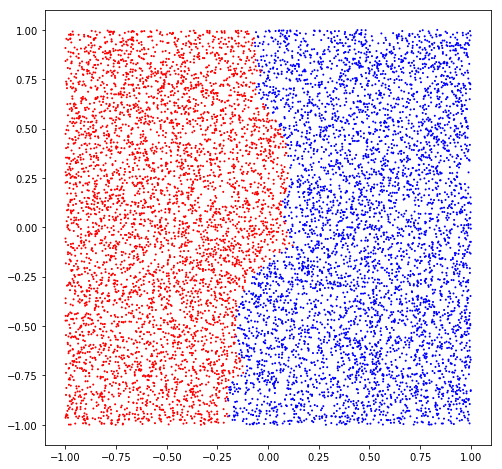

In [209]:
figure(figsize=[8,8])
scatter(unl[0,:],unl[1,:],s=1,c=c);